In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [67]:
# Load the dataset
df = pd.read_csv('Datasets_features.csv')

# Display the first few rows to verify
df.head()

,Numéro d'image,Caractéristique,Étiquette
0,0,0.373273,0
1,1,0.246365,0
2,10,0.322182,0
3,100,0.452206,0
4,1000,0.269899,0


In [68]:
# Features (X) and target (y)
X = df[['Caractéristique']]  # Double brackets ensure a DataFrame (2D)
y = df['Étiquette']

In [38]:
y

0       0
1       0
2       0
3       0
4       0
       ..
5211    1
5212    1
5213    1
5214    1
5215    1
Name: Étiquette, Length: 5216, dtype: int64

In [69]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [70]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, 
    test_size=0.2,        # 20% for testing
    random_state=42,      # Ensures reproducibility
    shuffle=True,         # Shuffles the data before splitting
    stratify=y            # Preserves the proportion of classes in the split
)

# Verify the split
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

Training set size: 4172 samples
Testing set size: 1044 samples


In [74]:
# Initialize the Logistic Regression model
logreg = LogisticRegression(
    solver='lbfgs',          # Algorithm to use in the optimization problem
    max_iter=1000,           # Maximum number of iterations
    random_state=42,         # Ensures reproducibility
)

# Train the model
logreg.fit(X_train, y_train)

print("Logistic Regression model trained successfully.")

Logistic Regression model trained successfully.


In [75]:
from joblib import dump

dump(logreg, "model/logreg-v3.pkl")

['model/logreg-v3.pkl']

In [76]:
# Predict on the test set
y_pred = logreg.predict(X_test)

# If you want probability estimates
y_pred_proba = logreg.predict_proba(X_test)

In [77]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {accuracy:.4f}")  # Rounded to 4 decimal places


Accuracy Score: 0.7395


In [46]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[198  70]
 [329 447]]


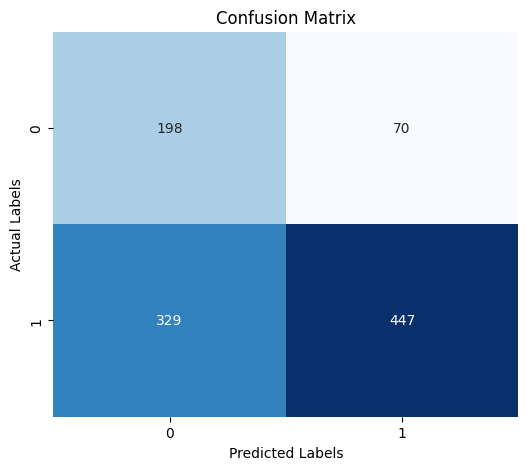

In [47]:
# Set up the matplotlib figure
plt.figure(figsize=(6,5))

# Create a heatmap for the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)

# Add labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix')

# If you have class names, you can specify them
# class_names = ['Class 0', 'Class 1']  # Replace with your actual class names
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
#             xticklabels=class_names, yticklabels=class_names)

plt.show()


In [48]:
X_train

array([[-0.66016194],
       [-0.67955751],
       [ 2.10975529],
       ...,
       [-0.19488551],
       [ 0.14888174],
       [ 0.01525404]])

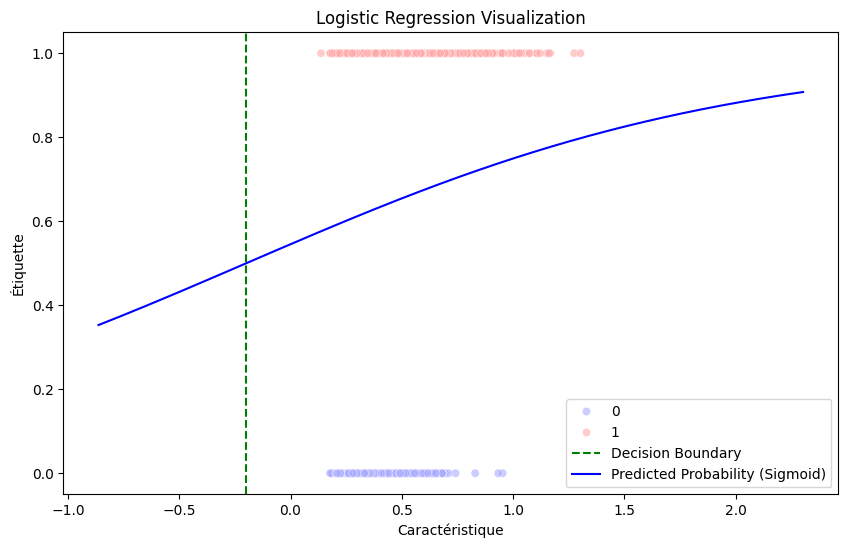

In [49]:
# Decision boundary
intercept = logreg.intercept_[0]
coef = logreg.coef_[0][0]
decision_boundary = -intercept / coef

# Generate range for predictions
X_range = np.linspace(df['Caractéristique'].min() - 1, df['Caractéristique'].max() + 1, 500).reshape(-1, 1)
probs = logreg.predict_proba(X_range.reshape(-1, 1))[:, 1]


# Plot point cloud and decision boundary
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Caractéristique', y='Étiquette', data=df, hue='Étiquette', palette='bwr', alpha=0.6)
plt.axvline(x=decision_boundary, color='green', linestyle='--', label='Decision Boundary')
plt.plot(X_range, probs, color='blue', label='Predicted Probability (Sigmoid)')
plt.title('Logistic Regression Visualization')
plt.xlabel('Caractéristique')
plt.ylabel('Étiquette')
plt.legend()
plt.show()